#1. 이미지 파일 처리 및 분류 적용

0. Caltech101 이미지 데이터: https://www.vision.caltech.edu/Image_Datasets/Caltech101/Caltech101.html

1. content의 caltech의 zip파일을 압축을 해제
- !unzip 파일이름.zip
2. 각 폴더에 있는 이미지들을 읽으셔서 크기를 50,50으로 resize하셔서, 모두 png 파일로 저장해주세요
 - 파일이름은 폴더이름_resized_일련번호.png

In [3]:
import os

os.chdir("/content/caltech")
!unzip 101_ObjectCategories.zip

Archive:  101_ObjectCategories.zip
  inflating: flamingo/image_0001.jpg  
  inflating: flamingo/image_0002.jpg  
  inflating: flamingo/image_0003.jpg  
  inflating: flamingo/image_0004.jpg  
  inflating: flamingo/image_0005.jpg  
  inflating: flamingo/image_0006.jpg  
  inflating: flamingo/image_0007.jpg  
  inflating: flamingo/image_0008.jpg  
  inflating: flamingo/image_0009.jpg  
  inflating: flamingo/image_0010.jpg  
  inflating: flamingo/image_0011.jpg  
  inflating: flamingo/image_0012.jpg  
  inflating: flamingo/image_0013.jpg  
  inflating: flamingo/image_0014.jpg  
  inflating: flamingo/image_0015.jpg  
  inflating: flamingo/image_0016.jpg  
  inflating: flamingo/image_0017.jpg  
  inflating: flamingo/image_0018.jpg  
  inflating: flamingo/image_0019.jpg  
  inflating: flamingo/image_0020.jpg  
  inflating: flamingo/image_0021.jpg  
  inflating: flamingo/image_0022.jpg  
  inflating: flamingo/image_0023.jpg  
  inflating: flamingo/image_0024.jpg  
  inflating: flamingo/image_0

In [14]:
categories = [ i for i in os.listdir() if not (i.endswith(".zip"))]
categories

['butterfly', 'chair', 'camera', 'elephant', 'flamingo']

In [15]:
#/content/caltech/result 폴더에 저장하기
from PIL import Image

os.makedirs("result")

for i in categories:
  files = os.listdir( i )
  q=1
  for j in files:
    img = Image.open(i+"/"+j)
    img.resize( (50, 50) )
    img.save("result/"+i+"_resized_"+str(q)+".jpg")
    q=q+1

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

os.chdir("/content/caltech")
#대상 카테고리
nb_classes = len(categories)

#image size
image_w=50
image_h=50
pixels = image_w * image_h * 3

#read
X=[]
Y=[]
categories

['butterfly', 'chair', 'camera', 'elephant', 'flamingo']

In [ ]:
np.array(img)

In [ ]:
import glob

os.chdir("/content")

for idx, cat in enumerate( categories):

  #label
  label=[0 for i in range(nb_classes)]
  label[idx]=1

  #image
  image_dir="caltech/"+cat
  files = glob.glob(image_dir+"/*.jpg") #현재 또는 주어진 디렉토리의 특정 확장자의 파일 선택
  print(image_dir)

  for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data=np.array(img)
    X.append(data)
    Y.append(label)
    if i%10 ==0:
      print(i, "\n", data)

X=np.array(X)
Y=np.array(Y)

print(X.shape)

#partition
X_train, X_test, y_train, y_test = train_test_split( X,Y)


#2. 플릭커 API를 통한 이미지 수집

In [19]:
# 플릭커 API를 통한 이미지 수집 및 라벨링
#www.flickr.com
#Yahoo.com 계정 생성 후에 Flickr API 페이지에 들어가서 생성
#https://www.flickr.com/services/api

#화면 상단의 App 제작 또는 Create APP 클릭->비상업용 키 신청->App 이름 및 설명 입력 후 등록(submit)
#key, secret을 보관
!pip install flickrapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00


In [20]:
os.getcwd()

'/content'

In [ ]:
from flickrapi import FlickrAPI
from urllib.request import urlretrieve
from pprint import pprint
import os, time, sys

key="348a661161bac897bf4f589ba140a26e"
secret="05eba4606a8c0d8a"

wait_time=1

#사진 검색 및 저장
savedir="udon"
if not os.path.exists(savedir):
 os.mkdir(savedir)

#API로 다운로드
flickr = FlickrAPI(key, secret, format="parsed-json")
res=flickr.photos.search( text="우동", per_page=200, media="photos", sort="relevance", safe_search=1, extras="url_q, license")

photos=res['photos']
pprint(photos)

In [22]:
try:
 for i , photo in enumerate(photos['photo']):
  url_q = photo['url_q']
  filepath = savedir+'/'+photo['id']+'.jpg'
  if os.path.exists(filepath):continue
  #print(str(i+1)+":download=", url_q)
  urlretrieve(url_q, filepath)
  time.sleep(wait_time)
except:
 import traceback
 traceback.print_exc()

# 2개 이상의 키워드로 플릭커에서 위의 코드를 이용하셔서 이미지를 수집해보세요.



Traceback (most recent call last):
  File "<ipython-input-22-8dc0ed9f47b5>", line 8, in <cell line: 1>
    time.sleep(wait_time)
KeyboardInterrupt


In [23]:
x=[]
y=[]

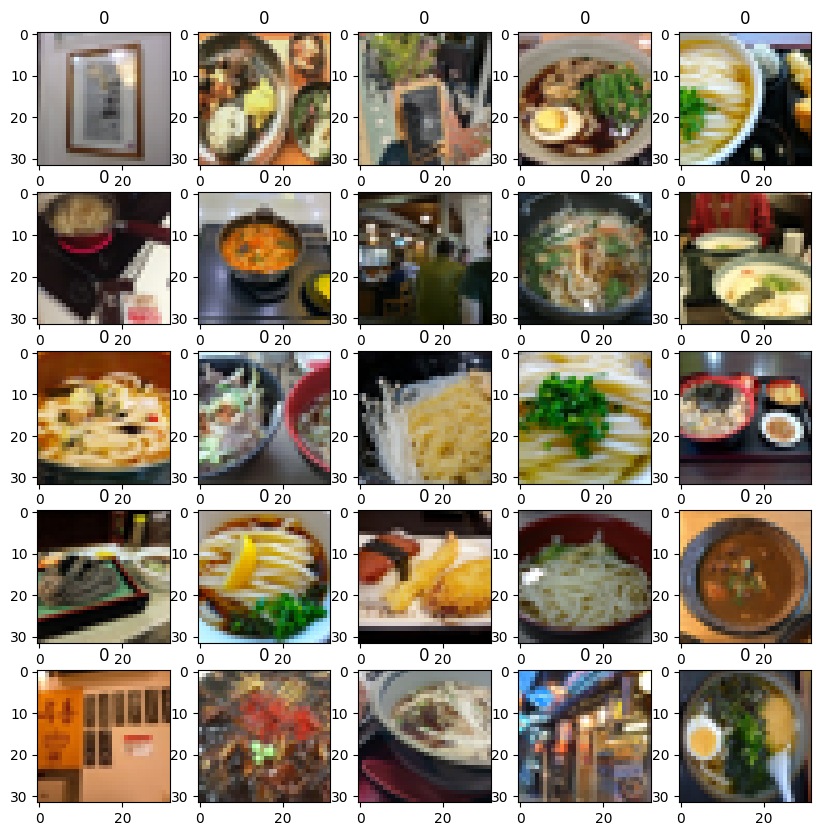

In [24]:
#flick 사진 처리
import numpy as np
from PIL import Image
import os, glob, random

max_photo = 100
photo_size=32

files = glob.glob( "udon"+"/*.jpg")
random.shuffle(files)

num=0

for f in files:
 if num >= max_photo: break
 num +=1
 img = Image.open(f)
 img= img.convert("RGB")
 img= img.resize((photo_size, photo_size))
 img= np.asarray(img)
 x.append(img)
 y.append(0)	#label을 0으로 지정


#이미지 출력
import matplotlib.pyplot as plt
idx = 0
plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5,5,i+1)
 plt.title(y[i+idx])
 plt.imshow(x[i+idx])
plt.show()



In [27]:
train_x, test_x, train_y, test_y = train_test_split( x, y, test_size=0.2)

In [28]:
x[0]/255

array([[[0.45882353, 0.43529412, 0.45490196],
        [0.67843137, 0.63921569, 0.68235294],
        [0.75686275, 0.72156863, 0.76862745],
        ...,
        [0.61960784, 0.58823529, 0.6       ],
        [0.60392157, 0.57254902, 0.58823529],
        [0.60784314, 0.57254902, 0.59215686]],

       [[0.46666667, 0.44705882, 0.45098039],
        [0.6745098 , 0.63921569, 0.68235294],
        [0.74117647, 0.70980392, 0.75686275],
        ...,
        [0.67058824, 0.63921569, 0.67058824],
        [0.65098039, 0.61960784, 0.65098039],
        [0.64705882, 0.61176471, 0.64313725]],

       [[0.41176471, 0.37254902, 0.40784314],
        [0.67843137, 0.64313725, 0.67843137],
        [0.72941176, 0.69803922, 0.74509804],
        ...,
        [0.67843137, 0.64705882, 0.68627451],
        [0.65882353, 0.62745098, 0.65882353],
        [0.65098039, 0.60784314, 0.64705882]],

       ...,

       [[0.5254902 , 0.50980392, 0.50588235],
        [0.51764706, 0.50196078, 0.49803922],
        [0.54117647, 0

#3.웹 수집

- 1 크롤링(Crawling), 스크래핑(Scarping)

- 2 HTTP(Hyper Text Transfer Protocol): 인터넷에서 데이터를 주고 받을 수 있는 프로토콜

- 3 HTML: 웹에 사용되는 표준 Markup언어

- 4 파싱(Parsing) : 어떤 페이지(문서, html)에서 원하는 데이터를 특정 패턴이나 순서로 추출하여 정보 가공



- HTML 소개

<Strong>
Hypertext Markup <U>Language </U> (HTML)
</Strong>

<h1>Test</h1>
<h1>This is heading 1</h1>
<h2>This is heading 2</h2>
<h3>This is heading</h3>
<h4>This is heading</h4>
<h5>This is heading</h5>
<h6>This is heading</h6>

# This is heading1

- 5 HTML 태그?: 태그 내부에 값을 넣을 수 있을 뿐만 아니라, 태그마다 속성을 부여할 수 있음. 태그의 속성은 <태그 속성="값"> 의 형태로 사용, 태그마다 여러 속성을 부여 할 수도 있음.

- 6 Xpath: XML 문서의 특정 요소나 속성에 접근하기 위한 경로를 지정하는 언어.

/html/body/div/span/a...

- 7 requests - 웹페이지 읽기 / urllib, urllib2 을 사용하거나 requests 를 사용
-HTTP GET, POST, PUT, DELETE 등을 사용할 수 있음
-데이타 인코딩 기능을 제공: 데이타를 Dictionary로 만들어 GET, POST 등에서 사용


In [29]:
!pip install requests

In [30]:
import requests
res = requests.get('http://www.naver.com')
print('결과: ', res.status_code) #200은 정상적인 접속

결과:  200


In [31]:
import requests
res = requests.get('https://www.naver.com/abcdefg')
print('결과 : ', res.status_code) #400수준 코드는 접속 불가

결과 :  404


In [32]:
import requests
res = requests.get('http://naver.com')
print('결과: ', res.status_code)

if res.status_code == requests.codes.ok:
  print('ok')
else :
  print("error code:",res.status_code)

결과:  200
ok


In [33]:
import requests
res = requests.get('http://naver.com')
print('결과 : ', res.status_code)

res.raise_for_status() #res가 정상이 아닌 경우 오류
print('crawling start')

결과 :  200
crawling start


In [34]:
import requests
res = requests.get('http://naver.com')
res.raise_for_status()

res.text

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세

In [35]:
import requests
res = requests.get('http://google.com')
res.raise_for_status()

with open('crawl1.html','w', encoding = 'utf-8') as f:
  f.write(res.text)


8) beautifulsoup : HTML 파싱을 위한 라이브러리

In [36]:
!pip install beautifulsoup4 #Parsing을 위한 라이브러리
!pip install lxml #XML parser로 이용

In [37]:
import requests
from bs4 import BeautifulSoup

url = 'https://comic.naver.com/webtoon/weekday.nhn'
res = requests.get(url)
res.raise_for_status()

soup = BeautifulSoup(res.text, "lxml")
soup


<!DOCTYPE html>
<html lang="ko">
<head>
<title>네이버 웹툰</title>
<link href="https://ssl.pstatic.net/static/m/comic/im/favicon/1804/webtoon_favicon_32x32.ico" rel="shortcut icon" type="image/x-icon"/>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="article" property="og:type"/>
<meta content="네이버 웹툰" property="og:article:author"/>
<meta content="https://comic.naver.com" property="og:article:author:url"/>
<meta content="네이버 웹툰" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/comic/images/og_tag_v2.png" property="og:image"/>
<meta content="매일매일 새로운 재미, 네이버 웹툰." property="og:description"/>
<script>
		if (/MSIE \d|Trident.*rv:/.test(navigator.userAgent)) {
			window.location = 'microsoft-edge:' + window.location;
			setTimeout(function () {
				window.location = 'https://go.microsoft.com/fwlink/?linkid=2135547';
			}, 1);
		}
	</script>
<script async="" src="https://ssl.pstatic.net/tveta/libs/glad/prod/gfp-core.js"></script>
<s

In [38]:
soup.title

<title>네이버 웹툰</title>

In [44]:
soup.title.get_text() #해당 태그에 대한 텍스트값

'네이버 웹툰'

9) daum 검색 결과

In [57]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=2022%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84')
res.raise_for_status()
soup = BeautifulSoup(res.text, 'lxml')

images = soup.find_all('img', attrs = {'class':'thumb_img'})

for idx, image in enumerate(images):
  print(image['src'])
  image_url = image['src']
  if image_url.startswith('//'):
    image_url = 'http'+ image_url

  print(image_url)
  image_res = requests.get(image_url)
  image_res.raise_for_status()

  with open('moive{}.jpg'.format(idx+1), 'wb')as f:
    f.write(image_res.content)
  if idx>=4 :#상위 5개 이미지 다운로드
    break

https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F3f7e3035989e7918c6426e541c864d0d8a295de2
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F3f7e3035989e7918c6426e541c864d0d8a295de2
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F4eb261668eb43a125d0adc250a89adb48216c005
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F4eb261668eb43a125d0adc250a89adb48216c005
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F0cdb0abb3d8da8c6332bf6a945a86f9a32f67abd
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F0cdb0abb3d8da8c6332bf6a945a86f9a32f67abd
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F2032840c034ca7a2536b55adabb0e8a5ca99dd83
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=

10) 네이버 주가 정보

In [54]:
import csv
import requests
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page='

for page in range(1,2):
  res = requests.get(url + str(page))
  res.raise_for_status()
  soup = BeautifulSoup(res.text, 'lxml')


  data_rows = soup.find('table',attrs={'class':'type_2'}).find('tbody').find_all('tr')
  for row in data_rows:
    columns = row.find_all('td')
    data = [column.get_text().strip() for column in columns]
    print(data)


['']
['1', '삼성전자', '73,400', '1,500', '+2.09%', '100', '4,381,820', '5,969,783', '52.91', '15,738,175', '11.08', '17.07', '']
['2', 'LG에너지솔루션', '542,000', '0', '0.00%', '500', '1,268,280', '234,000', '5.26', '321,917', '121.80', '5.75', '']
['3', 'SK하이닉스', '118,000', '3,900', '+3.42%', '5,000', '859,043', '728,002', '51.72', '5,618,237', '-36.88', '3.56', '']
['4', '삼성바이오로직스', '744,000', '4,000', '-0.53%', '2,500', '529,535', '71,174', '10.50', '64,361', '66.59', '11.42', '']
['5', '삼성전자우', '60,300', '400', '+0.67%', '100', '496,201', '822,887', '72.53', '994,740', '9.10', 'N/A', '']
['']
['']
['']
['6', '삼성SDI', '716,000', '1,000', '+0.14%', '5,000', '492,354', '68,765', '49.52', '184,912', '24.77', '12.52', '']
['7', 'LG화학', '680,000', '10,000', '+1.49%', '5,000', '480,028', '70,592', '46.99', '269,866', '32.63', '6.95', '']
['8', '현대차', '208,500', '5,000', '+2.46%', '5,000', '441,043', '211,532', '32.58', '654,405', '6.34', '9.36', '']
['9', 'POSCO홀딩스', '447,000', '15,500', '+3.59%'

In [58]:
import csv
import requests
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page='

for page in range(1,2):
  res = requests.get(url + str(page))
  res.raise_for_status()
  soup = BeautifulSoup(res.text, 'lxml')


  data_rows = soup.find('table',attrs={'class':'type_2'}).find('tbody').find_all('tr')
  for row in data_rows:
    columns = row.find_all('td')
    if len(columns) <=1: #비어있는 라인 제외시키기
      continue
    data = [column.get_text().strip() for column in columns]
    print(data)


['1', '삼성전자', '73,400', '1,500', '+2.09%', '100', '4,381,820', '5,969,783', '52.91', '15,738,175', '11.08', '17.07', '']
['2', 'LG에너지솔루션', '542,000', '0', '0.00%', '500', '1,268,280', '234,000', '5.26', '321,917', '121.80', '5.75', '']
['3', 'SK하이닉스', '118,000', '3,900', '+3.42%', '5,000', '859,043', '728,002', '51.72', '5,618,237', '-36.88', '3.56', '']
['4', '삼성바이오로직스', '744,000', '4,000', '-0.53%', '2,500', '529,535', '71,174', '10.50', '64,361', '66.59', '11.42', '']
['5', '삼성전자우', '60,300', '400', '+0.67%', '100', '496,201', '822,887', '72.53', '994,740', '9.10', 'N/A', '']
['6', '삼성SDI', '716,000', '1,000', '+0.14%', '5,000', '492,354', '68,765', '49.52', '184,912', '24.77', '12.52', '']
['7', 'LG화학', '680,000', '10,000', '+1.49%', '5,000', '480,028', '70,592', '46.99', '269,866', '32.63', '6.95', '']
['8', '현대차', '208,500', '5,000', '+2.46%', '5,000', '441,043', '211,532', '32.58', '654,405', '6.34', '9.36', '']
['9', 'POSCO홀딩스', '447,000', '15,500', '+3.59%', '5,000', '378,033'

In [59]:
import csv
import requests
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page='

filename = 'kospi.csv'

f = open(filename, 'w', encoding = 'utf-8-sig', newline = '') #utf-8에서 인코딩 문제 발생 시, utf-8-signature로 인코딩
writer = csv.writer(f)

for page in range(1,2):
  res = requests.get(url + str(page))
  res.raise_for_status()
  soup = BeautifulSoup(res.text, 'lxml')

  data_rows = soup.find('table',attrs={'class':'type_2'}).find('tbody').find_all('tr')
  for row in data_rows:
    columns = row.find_all('td')
    if len(columns) <=1: #의미 없는 데이터는 skip
      continue
    data = [column.get_text().strip() for column in columns]
    # print(data)
    writer.writerow(data)


In [60]:
import csv
import requests
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page='

filename = 'kospi2.csv'

f = open(filename, 'w', encoding = 'utf-8-sig', newline = '')
writer = csv.writer(f)

title = 'N	종목명	현재가	전일비	등락률	액면가	시가총액	상장주식수	외국인비율	거래량	PER	ROE'.split('\t')
writer.writerow(title)

for page in range(1,5):
  res = requests.get(url + str(page))
  res.raise_for_status()
  soup = BeautifulSoup(res.text, 'lxml')


  data_rows = soup.find('table',attrs={'class':'type_2'}).find('tbody').find_all('tr')
  for row in data_rows:
    columns = row.find_all('td')
    if len(columns) <=1: #의미 없는 데이터는 skip
      continue
    data = [column.get_text().strip() for column in columns]
    # print(data)
    writer.writerow(data)



12) 네이버 뉴스 수집

In [63]:
from bs4 import BeautifulSoup
from lxml import etree
from urllib import parse
import requests
import urllib.request
import urllib.parse
import numpy as np
import pandas as pd
import time

#----------------------------------------------#
#변경할 부분
startdate = "2022.01.27"
enddate = "2022.01.27"
searchword ="금융 디지털"#검색어
#----------------------------------------------#

base_url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query"+parse.urlencode([('',searchword)], doseq=True)+"&sort=1&photo=3&field=0&pd=3&ds="+startdate+"&de="+enddate+"&mynews=1&office_type=0&office_section_code=0&news_office_checked=&nso=so:dd,p:from"+startdate.replace(".", "")+"to"+enddate.replace(".", "")+",a:all&mynews=0&start="
titles = [ ]
urls = [ ]
i=1

while True:
 try:
    time.sleep(0.45)
    url = base_url+str(i)
    html = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')
    dom = etree.HTML(str(soup))
    t_news = dom.xpath('//a[@class="news_tit"]')
    t_len = len(t_news)

    if t_len <1:
        break

    for j in np.arange(t_len)+1:
            try:
                titles.append(dom.xpath('//a[@class="news_tit"]')[j].get("title"))
                urls.append(dom.xpath('//a[@class="info"]')[j].get("href"))
            except Exception as e:
                continue

    i=i+10

 except Exception as e:
    continue

result = pd.DataFrame({"Url": urls, "Title":titles})
result.to_csv("news_"+searchword+"_"+startdate+"_"+enddate+".csv", index=False)

13) api 활용 수집


In [62]:
!pip install -U pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 17.8 MB/s eta 0:00:00


In [64]:
from pykrx import stock

tickers = stock.get_market_ticker_list("20210115")
tickers

stock1 = stock.get_market_ticker_name("000660")
stock1

df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930")
df.head(5)

df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930", "m")
df.head(5)



,시가,고가,저가,종가,거래량
날짜,,,,,
2021-01-31,81000,90000,80200,88800,207737907


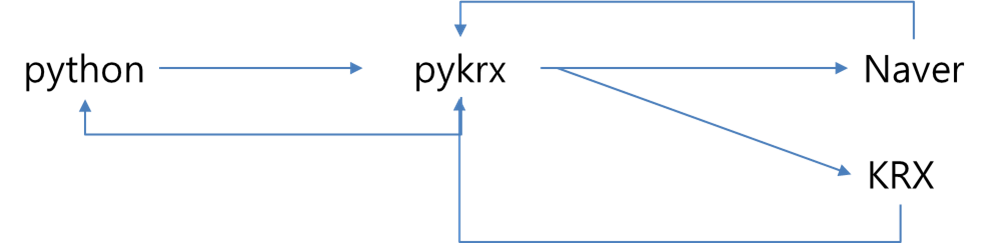

In [65]:
from pykrx import stock

tickers = stock.get_market_ticker_list("20210115")
len(tickers)
tickers

stock1 = stock.get_market_ticker_name("060310")
stock1


'3S'

In [66]:
df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930")
df.head(5)

#월별: m, 일별: d, 연도별: y
df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930", "d")
df

df = stock.get_market_ohlcv_by_date("20201104", "20210108", "005930", "m")
df



,시가,고가,저가,종가,거래량
날짜,,,,,
2020-11-30,58900,69500,57800,66700,460991347
2020-12-31,67100,81300,67100,81000,529998852
2021-01-31,81000,90000,80200,88800,207737907


In [67]:
df = stock.get_market_price_change_by_ticker("20210104", "20210115")
print(df.head(5))

df = stock.get_market_ohlcv_by_date("20210104", "20210115", "000020")
df

#KOSPI, KOSDAQ, KONEX 지원
df = stock.get_market_trading_volume_by_date("20210104", "20210115", "KOSPI")
print(df.head(5))

df = stock.get_market_trading_volume_by_date("20200101", "20210115", 'KOSPI', freq='m')
df

df = stock.get_market_trading_value_by_date("20210104", "20210115", "KOSPI")
df


            종목명      시가      종가   변동폭   등락률       거래량          거래대금
티커                                                                 
095570   AJ네트웍스    4615    4510  -105 -2.28   3982449   18726203680
006840    AK홀딩스   25150   26300  1150  4.57   1590631   41092351750
027410      BGF    4895    4830   -65 -1.33   4729036   23091599895
282330   BGF리테일  135500  145000  9500  7.01    809850  114155484750
138930  BNK금융지주    5680    5880   200  3.52  36350605  209410643490
                기관합계      기타법인        개인     외국인합계  전체
날짜                                                    
2021-01-04 -18241927  -2321155  13307925   7255157   0
2021-01-05   -282797 -20356879  21335001   -695325   0
2021-01-06 -28606702   1763197  19464237   7379268   0
2021-01-07  16803440  -4926713 -23957887  12081160   0
2021-01-08 -24886527   1334709   6228334  17323484   0


,기관합계,기타법인,개인,외국인합계,전체
날짜,,,,,
2021-01-04,-1189876714363,69165156608,1031014166618,89697391137,0
2021-01-05,-536265643081,16098509714,728387733108,-208220599741,0
2021-01-06,-1369155503764,37370130195,1729261196142,-397475822573,0
2021-01-07,1033917002121,36342229807,-1183634539101,113375307173,0
2021-01-08,-1147931424901,63596153201,-559141825960,1643477097660,0
2021-01-11,-3743203896260,-31327947241,4492145003867,-717613160366,0
2021-01-12,-1723898682006,30388878033,2312445113552,-618935309579,0
2021-01-13,-372450411172,9868157834,169086090692,193496162646,0
2021-01-14,-1428981445508,38743362517,712730906649,677507176342,0


In [68]:
df = stock.get_market_fundamental_by_ticker("20210115")
print(df.head(2))

df = stock.get_market_fundamental_by_date("20210104", "20210115", '005930')
print(df.head(2))

df = stock.get_market_fundamental_by_date("20201004", "20210115", "005930", "m")
print(df.head(2))


          BPS    PER   PBR   EPS   DIV  DPS
티커                                         
095570   6802   4.59  0.66   982  6.65  300
006840  62448  12.13  0.42  2168  2.85  750
              BPS    PER   PBR   EPS   DIV   DPS
날짜                                              
2021-01-04  37528  26.22  2.21  3166  1.71  1416
2021-01-05  37528  26.50  2.24  3166  1.69  1416
              BPS    PER   PBR   EPS   DIV   DPS
날짜                                              
2020-10-31  37528  18.54  1.56  3166  2.41  1416
2020-11-30  37528  18.13  1.53  3166  2.47  1416


#4. 텍스트 데이터 처리

### NLP & Text Mining
- 자연어처리: Natural Language Processing
- Text Mining: 텍스트 데이터를 자연어 처리 기술로 유용한 정보를 추출하여 분석
- 텍스트 마이닝 응용 분야: 분류, 감성 분석, 요약, 군집

- 텍스트 자료의 정형화
 - TDM 또는 DTM
 - Word2Vec, Doc2Vec 등 임베딩 기법


- 사용 라이브러리
 - NLTK(National Language Toolkit for python): 기본 필수 라이브러리, 속도 이슈.
 - Gensim : 토픽 모델링, 임베딩 등의 기능 제공
 - Word Colud : 시각화
 - KoNLPy: 한글처리

- NLP 단계
 - Cleansing: 불필요한 문자/문장부호/수치/태그 등 제거
 - 토큰(token): 문법적으로 최소 언어요소
 - 토큰화(Text Toeknization): Corpus로 부터 토큰 추출
 - Stop word 제거 : 분석에 큰 의미가 없는 단어(a, the, is, will등) 정리
 - Stemming / Lemmatization : 어근(단어 원형) 추출+단어원형 찾기
 - N-gram: 개별 단어 각각이 토큰이 되는 경우 문맥적 고려 어려움, N-gram은 연속된 n개의 단어를 하나의 토큰처럼 분리. n개 윈도우로 순서대로 토큰화


### 텍스트 전처리 심화 실습: 영어

In [69]:
!pip install nltk

-Tokenization

In [70]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
print(word_tokenize("Don't eat too much, Mr. Jone's food is not delicious."))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Do', "n't", 'eat', 'too', 'much', ',', 'Mr.', 'Jone', "'s", 'food', 'is', 'not', 'delicious', '.']


In [71]:
from nltk import word_tokenize

sentence = "The dog runs everywhere, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 11
['The', 'dog', 'runs', 'everywhere', ',', 'here', 'even', 'in', 'this', 'room', '.']


-문장부호로도 토큰화: WordPunctTokenizer

In [72]:
from nltk.tokenize import WordPunctTokenizer
sentence = "Don't eat too much, Mr. Jone's food is not delicious."
words = WordPunctTokenizer().tokenize(sentence)
print(words)

['Don', "'", 't', 'eat', 'too', 'much', ',', 'Mr', '.', 'Jone', "'", 's', 'food', 'is', 'not', 'delicious', '.']


-nltk 대신 keras의 text_to_word_sequence 활용

In [73]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
sentence = "Don't eat too much, Mr. Jone's food is not delicious."
words = text_to_word_sequence(sentence)
print(words)

["don't", 'eat', 'too', 'much', 'mr', "jone's", 'food', 'is', 'not', 'delicious']


-표준 토큰화 예제: Penn Treebank Tokenization
- 하이픈, 어퍼스트러피 등 구분

In [74]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print(tokenizer.tokenize(text))

['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


-문장 토큰화(Sentence Tokenization)


In [75]:
from nltk.tokenize import sent_tokenize
text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print(sent_tokenize(text))

['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


In [76]:
from nltk.tokenize import sent_tokenize
text = "I am actively looking for Ph.D. students. and you are a Ph.D student."
print(sent_tokenize(text))

['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


In [77]:
from nltk import sent_tokenize

import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


-불용어(Stop word) 제거

In [78]:
import nltk
nltk.download('stopwords')

print(len(nltk.corpus.stopwords.words('english')))

print(nltk.corpus.stopwords.words('english')[:40])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [79]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example)

result = []
for token in word_tokens:
    if token not in stop_words:
        result.append(token)

print(word_tokens)
print(result)

['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


-한국어 불용어: https://www.ranks.nl/stopwords/korean
별도의 불용어를 유지하는 방법도 있음.

In [80]:
from nltk.tokenize import word_tokenize

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든"

stop_words = set(stop_words.split(' '))
word_tokens = word_tokenize(example)

result = [word for word in word_tokens if not word in stop_words]

print(word_tokens)
print(result)

['고기를', '아무렇게나', '구우려고', '하면', '안', '돼', '.', '고기라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']
['고기를', '구우려고', '안', '돼', '.', '고기라고', '다', '같은', '게', '.', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']


-Cleaning and Normalization
 - Cleaning: noise 제거
 - Normalization : 소문자 변환 및 표제어 등으로 통합
 - 길이가 짧은 토큰 제거



In [81]:
import re
text = "I was wondering if anyone out there could enlighten me on this car."

# 길이가 1~2인 단어 제거
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))

 was wondering anyone out there could enlighten this car.


- Stemming  & Lemmatization
- NLTK의 Stemmer: Porter, Lancaster, Snowball Stemmer

In [82]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))
print(stemmer.stem('was'), stemmer.stem('love'))

work work work
amus amus amus
happier happiest
fancier fanciest
wa love


- Lancaster Stemmer

In [83]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))
print(stemmer.stem('was'), stemmer.stem('love'))

work work work
amus amus amus
happy happiest
fant fanciest
was lov


In [84]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()
text = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
words = word_tokenize(text)
print(words)

['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']


In [85]:
print([stemmer.stem(w) for w in words])

['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


In [86]:
words = ['formalize', 'allowance', 'electricical']
print([stemmer.stem(w) for w in words])

['formal', 'allow', 'electric']


-표제어 추출(Lemmatization): '기본 사전형 단어', Stemming 이후 적용

In [87]:
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing'),lemma.lemmatize('amuses'),lemma.lemmatize('amused'))
print(lemma.lemmatize('happier'),lemma.lemmatize('happiest'))
print(lemma.lemmatize('fancier'),lemma.lemmatize('fanciest'))
print(lemma.lemmatize('was'), lemma.lemmatize('love'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amusing amuses amused
happier happiest
fancier fanciest
wa love


-품사 정보 활용

In [88]:
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))
print(lemma.lemmatize('was', 'v'), lemma.lemmatize('love', 'v'))

amuse amuse amuse
happy happy
fancy fancy
be love


-다른 예제

In [89]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print([lemmatizer.lemmatize(w) for w in words])

['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 정규 표현식(Regular Expression)

참고


<figure>
<img src = 'https://miro.medium.com/max/700/1*Y-q0dkUClSW0dX6uuysnJQ.png'>
<figure>

<figure>
<img src = 'https://miro.medium.com/max/700/1*c__WeRlFyGY_-7LeKQkNnQ.png'>
<figure>



<figure>
<img src = 'https://miro.medium.com/max/661/1*6pIp6zuIoRHUOXjEDDUNCA.png'>
<figure>

In [90]:
import re
r = re.compile("a.c")
r.search("kkk")
# 아무런 결과도 출력되지 않는다.
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [91]:
r = re.compile("ab?c")
r.search("abbc")
# 아무것도 출력되지 않음
r.search("abc")
# b가 있는 것으로 판단하여 abc를 매치함.

<re.Match object; span=(0, 3), match='abc'>

In [92]:
r.search("ac")
# b가 없는 것으로 판단하여 ac를 매치함.

<re.Match object; span=(0, 2), match='ac'>

- 0개 이상 문자 매치


In [93]:
r = re.compile("ab*c")
r.search("a")
# 아무것도 출력되지 않음.

In [94]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [95]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [96]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

- '+' : 최소 1번 이상 출현


In [97]:
r = re.compile('ab+c')
r.search("ac")
# 아무것도 출력되지 않는다.

r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

- ' ^': 시작 문자 지정

In [98]:
r = re.compile('^a')
r.search('bbc')
# 아무것도 출력되지 않음
r.search('ab')

<re.Match object; span=(0, 1), match='a'>

{숫자}: 출현 빈도 지정
{숫자1, 숫자2}
{숫자,}

문자에 해당 기호를 붙이면, 해당 문자를 숫자만큼 반복한 것을 나타낸다. 예를 들어 정규 표현식이 ab{2}c라면 a와 c사이에 b가 존재하면서 b가 2개인 문자열에 대해서 매치한다.

In [99]:
r = re.compile("ab{2}c")
r.search("ac")
# 아무것도 출력되지 않는다.
r.search("abc")
# 아무것도 출력되지 않는다.
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [100]:
r.search("abbbbbc")

In [101]:
r = re.compile("ab{2,8}c")
r.search('ac')
# 아무런 결과도 출력되지 않음
r.search("abc")
# 아무런 결과도 출력되지 않음
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [102]:
r.search("abbbbc")

<re.Match object; span=(0, 6), match='abbbbc'>

In [103]:
r.search("abbbbbbbbbbbbbc")

In [104]:
r = re.compile("a{2,}bc")
r.search("bc")
# 아무런 결과도 출력되지 않음
r.search("aa")
# 아무런 결과도 출력되지 않음
r.search("aabc")

<re.Match object; span=(0, 4), match='aabc'>

In [105]:
r.search("aaaaabc")

<re.Match object; span=(0, 7), match='aaaaabc'>

[] : [ ] 안 문자들과 매치
[a-zA-Z]
[0–9]

In [106]:
r = re.compile("[abc]")
r.search('zzz')
# 아무것도 출력되지 않음
r.search('a')

<re.Match object; span=(0, 1), match='a'>

In [107]:
r.search('acg')

<re.Match object; span=(0, 1), match='a'>

In [108]:
r.search('babo')

<re.Match object; span=(0, 1), match='b'>

[^문자]:  ^ 기호 뒤에 붙은 문자들을 제외한 모든 문자를 매치

In [109]:
r = re.compile('[^abc]')
r.search("a")
# 아무것도 출력되지 않음
r.search("ahoho")

<re.Match object; span=(1, 2), match='h'>

In [110]:
r.search("1st")

<re.Match object; span=(0, 1), match='1'>

- re.match()와 re.search()의 차이
 - search()가 정규 표현식 전체에 대해서 문자열이 매치하는지를 본다면, match()는 문자열의 첫 부분부터 정규표현식과 매치하는지를 확인
문자열 중간에 찾을 패턴이 있다고 하더라도, match 함수는 문자열의 시작에서 패턴이 일치하지 않으면 찾지 않음

In [111]:
r = re.compile("ab.")
r.search("kkkabc")

<re.Match object; span=(3, 6), match='abc'>

In [112]:
r.match("kkkabc")
# 아무것도 출력되지 않음

In [113]:
r.match("abckkk")

<re.Match object; span=(0, 3), match='abc'>

 - re.split(): 입력된 정규 표현식을 기준으로 문자열들을 분리하여 리스트로 리턴

In [114]:
text = "사과 딸기 수박 멜론 바나나"
re.split(" ",text)

['사과', '딸기', '수박', '멜론', '바나나']

In [ ]:
text = """사과
딸기
수박
멜론
바나나"""
re.split("\n", text)

In [116]:
text = "사과+딸기+수박+멜론+바나나"
re.split("\+", text)

['사과', '딸기', '수박', '멜론', '바나나']

 - re.findall(): 정규 표현식과 매치되는 모든 문자열들을 리스트로 반환

In [ ]:
text = """이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""
re.findall("\d+", text)

In [118]:
re.findall("\d+", "문자열입니당.")

[]

 - re.sub()

In [119]:
text="Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."
re.sub('[^a-zA-Z]',' ',text)

'Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern '

정규 표현식 텍스트 전처리 연습

In [120]:
text = """100 John    PROF
101 James    STUD
102 Mac    STUD"""
re.split('\s+', text)

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

'\s+' 는 공백 여러 개를 기준으로 split


In [121]:
re.findall('\d+', text)

['100', '101', '102']

'\d+' 숫자 문자열을 반환

In [122]:
re.findall('[A-Z]', text)

['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']

In [123]:
re.findall('[A-Z]{4}',text)

['PROF', 'STUD', 'STUD']

In [124]:
re.findall('[A-Z][a-z]+', text)

['John', 'James', 'Mac']

정규 표현식을 이용한 토큰화: RegexpTokenizer

In [125]:
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w]+")
print(tokenizer.tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"))

['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


### 토큰 인코딩

1) Dictionary 사용



In [126]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [127]:
text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."

In [128]:
# 문장 토큰화
text = sent_tokenize(text)
print(text)

['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']


- 기존의 텍스트 데이터가 문장 단위로 토큰화 되며, 정제 작업을 병행하며, 단어 토큰화를 수행

In [129]:
import nltk
nltk.download('stopwords')

#정제와 단어 토큰화
vocab = {} # 파이썬의 dictionary 자료형
sentences = []
stop_words = set(stopwords.words('english'))

for i in text:
    sentence = word_tokenize(i) # 단어 토큰화를 수행합니다.
    result = []

    for word in sentence:
        word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄입니다.
        if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거합니다.
            if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거합니다.
                result.append(word)
                if word not in vocab:
                    vocab[word] = 0
                vocab[word] += 1
    sentences.append(result)
print(sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [130]:
print(vocab)

{'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


In [131]:
print(vocab["barber"]) # 'barber'라는 단어의 빈도수 출력

8


In [132]:
#빈도수가 높은 순서대로 정렬
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]


In [133]:
#높은 빈도수를 가진 단어일수록 낮은 정수 인덱스를 부여
word_to_index = {}
i=0
for (word, frequency) in vocab_sorted :
    if frequency > 1 : # 정제(Cleaning) 챕터에서 언급했듯이 빈도수가 적은 단어는 제외한다.
        i=i+1
        word_to_index[word] = i
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


In [134]:
vocab_size = 5
words_frequency = [w for w,c in word_to_index.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
for w in words_frequency:
    del word_to_index[w] # 해당 단어에 대한 인덱스 정보를 삭제
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


In [135]:
word_to_index['OOV'] = len(word_to_index) + 1

In [136]:
#word_to_index를 사용하여 sentences의 모든 단어들을 맵핑되는 정수로 인코딩

encoded = []
for s in sentences:
    temp = []
    for w in s:
        try:
            temp.append(word_to_index[w])
        except KeyError:
            temp.append(word_to_index['OOV'])
    encoded.append(temp)
print(encoded)

[[1, 5], [1, 6, 5], [1, 3, 5], [6, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6]]


- NLTK의 FreqDist

In [137]:
from nltk import FreqDist
import numpy as np

In [138]:
# np.hstack으로 문장 구분을 제거하여 입력으로 사용 . ex) ['barber', 'person', 'barber', 'good' ... 중략 ...
vocab = FreqDist(np.hstack(sentences))

In [139]:
print(vocab["barber"]) # 'barber'라는 단어의 빈도수 출력

8


In [140]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

In [141]:
word_to_index = {word[0] : index + 1 for index, word in enumerate(vocab)}
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


- keras 기능

In [142]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [143]:
preprocessed_sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

In [144]:
tokenizer = Tokenizer()

# fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성.
tokenizer.fit_on_texts(preprocessed_sentences)

In [145]:
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


 - 단어가 인덱스 부여


In [146]:
print(tokenizer.word_counts)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


 - 이미 정해진 인덱스로 변환

In [147]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


 - 상위 인덱스 5개 단어만 사용

In [148]:
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 1) # 상위 5개 단어만 사용
tokenizer.fit_on_texts(preprocessed_sentences)

In [149]:
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


 - 품사태깅

In [150]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [151]:
from nltk.tokenize import word_tokenize
text="I am actively looking for Ph.D. students. and you are a Ph.D. student."
print(word_tokenize(text))

['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']


In [152]:
from nltk.tag import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
x=word_tokenize(text)
pos_tag(x)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('I', 'PRP'),
 ('am', 'VBP'),
 ('actively', 'RB'),
 ('looking', 'VBG'),
 ('for', 'IN'),
 ('Ph.D.', 'NNP'),
 ('students', 'NNS'),
 ('.', '.'),
 ('and', 'CC'),
 ('you', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('Ph.D.', 'NNP'),
 ('student', 'NN'),
 ('.', '.')]

# 5. 한글 처리
- 한국어 처리: 형태소 분석기 Okt(Open Korea Text), 메캅(Mecab), 코모란(Komoran), 한나눔(Hannanum), 꼬꼬마(Kkma)



- 형태소 분석:
 - KoNLPy는 다음과 같은 다양한 형태소 분석, 태깅 라이브러리를 제공

 - Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.

 - http://semanticweb.kaist.ac.kr/hannanum/

 - Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.

 - http://kkma.snu.ac.kr/

 - Komoran: 코모란. Shineware에서 개발.

 - https://github.com/shin285/KOMORAN

 - Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.

 - https://bitbucket.org/eunjeon/mecab-ko

 - Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.

 - https://github.com/open-korean-text/open-korean-text

In [153]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 40.7 MB/s eta 0:00:00


In [154]:
from konlpy.tag import Okt
okt=Okt()
print(okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
# 텍스트를 형태로 단위로 나누는데,이때 각 단어에서 어간을 추출

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']


In [155]:
print(okt.pos('열심히 코딩한 당신, 연휴에는 여행을 가봐요'))
# 품사추출.

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]


In [156]:
print(okt.nouns('열심히 코딩한 당신, 연휴에는 여행을 가봐요'))
# 명사추출.

['코딩', '당신', '연휴', '여행']


- 1) morphs : 형태소 추출
- 2) pos : 품사 태깅
- 3) nouns : 명사 추출


- Kkma 이용 시

In [157]:
from konlpy.tag import Kkma
kkma=Kkma()
print(kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']


In [158]:
print(kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]


- Py-Hanspell: 맞춤법 체크


In [159]:
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-wwpdmbyb
  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-wwpdmbyb
  Resolved https://github.com/ssut/py-hanspell.git to commit fdc6ca50c19f1c85971437a072d89d4e5ce024b8
  Preparing metadata (setup.py) ... done
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4810 sha256=ca8c42f083f66ff9cb6b8df828e9886cefdaf0aa62d76ed615fb6c4fcaaabb55
  Stored in directory: /tmp/pip-ephem-wheel-cache-2u9ummud/wheels/2e/43/cc/753c9e1d91affb9ea40e186cea5654fb9231deb454da6724e5
Successfully built py-hanspell


In [160]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지 


# 6. 언어모델 VS BOW
- 언어 모델(Language Model): 단어 시퀀스에 확률을 할당(assign), 문장의 확률 예측
 - 통계 기반 VS GPT 나 Bert, Transformer 또한 인공 신경망 모델 기반


- BOW(bag of words): 전통적 방식
 - Bag of Words란 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화
 - 쉽게 빠른 구축
 - 예상보다 문서의 특징을 잘 나타내어 전통적으로 여러분야에서 활용도가 높음
 - 문맥 의미(Semantic Context) 반영 문제
 - 희소 행렬 문제




In [185]:
from konlpy.tag import Okt
import re
okt=Okt()

token=re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")
# 정규 표현식을 통해 마침표 제거
token=okt.morphs(token)
# OKT 형태소 분석기를 통해 토큰화 작업을 수행

word2index={} # dict
bow=[] #bag
for voca in token:
         if voca not in word2index.keys():  #dict의 키가 없다면,
             word2index[voca]=len(word2index) # token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가
             bow.insert(len(word2index)-1,1) # BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문
         else:
            index=word2index.get(voca) # 재등장하는 단어의 인덱스를 확인
            bow[index]=bow[index]+1 # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더하기
print(word2index)

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [186]:
bow

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]

- CountVectorizer 이용

In [187]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 저장.
print(vector.vocabulary_) # 각 단어의 인덱스 부여된 상태를 제시

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


- 불용어를 제거한 Bow 만들기
 - 사용자 정의 불용어

In [188]:
from sklearn.feature_extraction.text import CountVectorizer

text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


- CountVectorizer에서 제공하는 자체 불용어 사용

In [189]:
from sklearn.feature_extraction.text import CountVectorizer

text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1]]
{'family': 0, 'important': 1, 'thing': 2}


- NLTK에서 지원하는 불용어 사용

In [190]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

text=["Family is not an important thing. It's everything."]
sw = stopwords.words("english")
vect = CountVectorizer(stop_words =sw)
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


# 7. 문헌 용어 행렬(Document-Term Matrix, DTM)


- 희소 표현(Sparse representation)
- 단순 빈도 수 기반 접근




- TF-IDF(Term Frequency-Inverse Document Frequency)
 - TF-IDF는 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티를 주는 방식으로 값을 부여


- sklearn을 이용한 DTM과 TF-IDF 실습

In [191]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [192]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [243]:
news = pd.read_csv("news.csv", index_col=0)
news

,label,articles
0,0,게티이미지뱅크 콩나물(사진)은 대두를 발아시켜 뿌리를 자라게 한 것이다. 동의보감에...
1,0,"사진 한 장 없이 떠난 일지 스님 불교 현실에 대한 질타 등 생전에 연재했던 글, ..."
2,0,이재익의 아재음악 열전전태관(왼쪽)과 김종진. <한겨레> 자료사진 2018년을 얼마...
3,0,서울대병원 제공서울대병원은 올해 1월부터 국내에서 독자적으로 개발한 인공지능 기술을...
4,0,ㆍ2.1㎓ 속도 ‘엑시노스 오토 V9’ㆍ2021년 생산 차량부터 탑재2021년 생산...
...,...,...
395,1,박정호 SK텔레콤 사장이 SK브로드밴드 사장을 겸직한 이후 첫 행보로 ‘옥수수 연합...
396,1,LG전자가 세계 최초 88인치 8K OLED TV를 내놓는다. 인공지능(AI) 기술...
397,1,"게임은 사회악 아닌 건전한 놀이문화(지디넷코리아=이도원 기자)""게임산업 전체의 발전..."
398,1,10여년 만에 매출예상치 하향…주가도 폭락(지디넷코리아=김익현 기자)최근 10년 여...


In [244]:
!pip install konlpy

from konlpy.tag import Okt
okt = Okt() #Kkma, Hannanum....
okt.nouns( news.articles[0] )  #수집된 첫번째 기사에 대한 명사

def tokenizer(text):  #함수를 만드는 부분
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = okt.nouns(text) #nouns를 morphs로 바꾸면 명사외에도...
    return tokens_ko


In [245]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vect = TfidfVectorizer(tokenizer=tokenizer,
                          #바뀐곳-stop_words로 잡힌 단어를 제거
                          stop_words=['건','악','최', '초','총', '탈', '폭'],
                          #바뀐곳-0~1사이의 값, 단어
                          min_df=0.1)
dtm = tf_vect.fit_transform( news.articles )
dtm


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<400x364 sparse matrix of type '<class 'numpy.float64'>'
	with 29578 stored elements in Compressed Sparse Row format>

- 20 Newsgroup 분류 실습
 - 188846개의 뉴스 20개의 뉴스 카테고리로 분류하기.



In [193]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset = 'all', random_state = 42)

In [194]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [196]:
import pandas as pd

print('target 클래스 및 빈도 \n',pd.Series(news_data.target).value_counts().sort_index())
print('target 명칭 \n',news_data.target_names)

target 클래스 및 빈도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 명칭 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [197]:
print(news_data.data[0])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [199]:
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습용(Train) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
train_news= fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
X_train = train_news.data
y_train = train_news.target
print(type(X_train))

# subset='test'으로 테스트(Test) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
test_news= fetch_20newsgroups(subset='test',remove=('headers', 'footers','quotes'),random_state=156)
X_test = test_news.data
y_test = test_news.target
print('train set size {0} , test set size {1}'.format(len(train_news.data) , len(test_news.data)))

<class 'list'>
train set size 11314 , test set size 7532


In [200]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 feature extraction 변환 수행.
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train , y_train) #cnt_ect.fit_transform(X_train,y_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit( )된 CountVectorizer를 이용하여 테스트 데이터를 feature extraction 변환 수행.
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 Text의 CountVectorizer Shape:',X_train_cnt_vect.shape)

학습 데이터 Text의 CountVectorizer Shape: (11314, 101631)


In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# LogisticRegression을 이용하여 학습/예측/평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect , y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression precision {0:.3f}'.format(accuracy_score(y_test,pred)))

CountVectorized Logistic Regression 의 예측 정확도는 0.606


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [202]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환.
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용하여 학습/예측/평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

TF-IDF Logistic Regression 의 예측 정확도는 0.674


In [204]:
# stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경하여 Feature Vectorization 적용.
tfidf_vect = TfidfVectorizer(stop_words='english',max_df=300 )
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.690


In [237]:
from sklearn.model_selection import GridSearchCV

# 최적 C 값 도출 튜닝 수행. CV는 3 Fold셋으로 설정.
params = { 'C':[0.01, 0.1]}
grid_cv_lr = GridSearchCV(lr_clf ,param_grid=params , cv=3 , scoring='accuracy' , verbose=1 )
grid_cv_lr.fit(X_train_tfidf_vect , y_train)
print('Logistic Regression best C parameter :',grid_cv_lr.best_params_ )

# 최적 C 값으로 학습된 grid_cv로 예측 수행하고 정확도 평가.
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Logistic Regression best C parameter : {'C': 0.1}
TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.659


- sklearn의 파이프라인(Pipeline) 사용 및 GridSearchCV와의 결합

In [ ]:
from sklearn.pipeline import Pipeline

# TfidfVectorizer 객체를 tfidf_vect 객체명으로, LogisticRegression객체를 lr_clf 객체명으로 생성하는 Pipeline생성
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english',  max_df=300)),
    ('lr_clf', LogisticRegression(C=10))
])

# 별도의 TfidfVectorizer객체의 fit_transform( )과 LogisticRegression의 fit(), predict( )가 필요 없음.
# pipeline의 fit( ) 과 predict( ) 만으로 한꺼번에 Feature Vectorization과 ML 학습/예측
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))